#importing Librarries

In [ ]:
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#import Dataset

In [ ]:
full_data  = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [ ]:
full_data.shape

(1190, 12)

In [ ]:
full_data.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


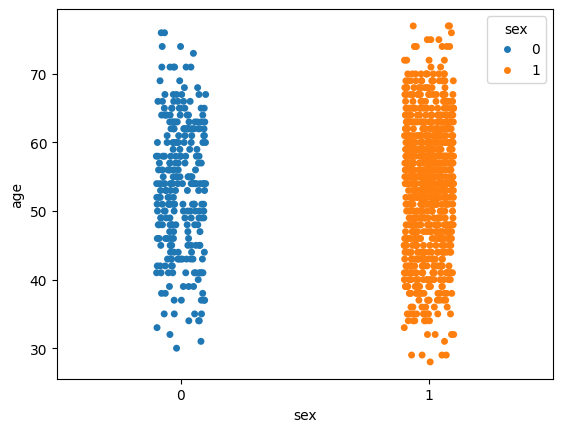

In [ ]:
sns.stripplot(x = 'sex', y = 'age', hue = 'sex', data = full_data)
plt.show()


<ipython-input-7-942e96370eb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data['age'])


<function matplotlib.pyplot.show(close=None, block=None)>

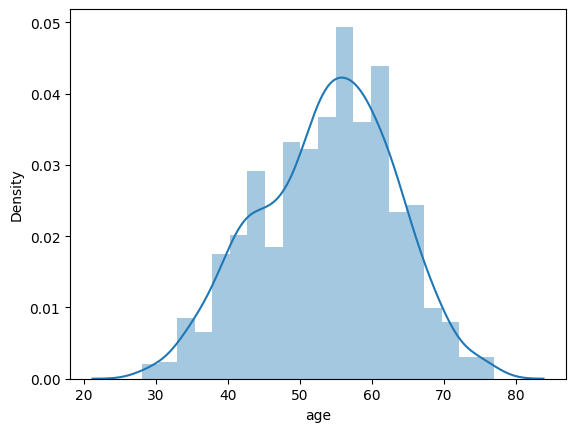

In [ ]:
sns.distplot(full_data['age'])
plt.show

In [ ]:
full_data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
x = full_data.iloc[: , : -1].values
y = full_data.iloc[: , -1].values

In [ ]:
print(x)

[[40.   1.   2.  ...  0.   0.   1. ]
 [49.   0.   3.  ...  0.   1.   2. ]
 [37.   1.   2.  ...  0.   0.   1. ]
 ...
 [57.   1.   4.  ...  1.   1.2  2. ]
 [57.   0.   2.  ...  0.   0.   2. ]
 [38.   1.   3.  ...  0.   0.   1. ]]


In [ ]:
print(y)

[0 1 0 ... 1 1 0]


#split data into training  and testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.20 , random_state=101 )

In [ ]:
print(x_train)

[[60.   0.   3.  ...  0.   0.   1. ]
 [50.   1.   4.  ...  1.   1.1  2. ]
 [50.   1.   4.  ...  1.   2.   2. ]
 ...
 [46.   1.   3.  ...  0.   0.   1. ]
 [55.   1.   4.  ...  1.   1.7  3. ]
 [65.   1.   4.  ...  0.   0.6  1. ]]


In [ ]:
x_train.shape

(952, 11)

In [ ]:
print(x_test)

[[63.   0.   4.  ...  1.   1.8  2. ]
 [33.   1.   3.  ...  0.   0.   1. ]
 [54.   1.   4.  ...  1.   1.   2. ]
 ...
 [53.   0.   4.  ...  0.   0.   1. ]
 [43.   1.   4.  ...  0.   0.   1. ]
 [53.   1.   4.  ...  0.   0.   2. ]]


In [ ]:
x_test.shape

(238, 11)

In [ ]:
print(y_train)

[0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1
 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0
 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1
 0 0 0 1 0 1 1 1 1 1 0 0 

In [ ]:
y_train.shape

(952,)

In [ ]:
print(y_test)

[1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1]


In [ ]:
y_test.shape

(238,)

#Moel Training

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg_classifier.predict(x_test)#prediction on testing data

In [ ]:
print(y_pred)

[0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1
 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1
 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1
 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1]


#accuracy score

In [ ]:
from sklearn.metrics import accuracy_score,precision_score
acc_score =accuracy_score(y_test, y_pred)
print(f'"accuracy score : "{acc_score*100}')

"accuracy score : "87.81512605042016


#precision score

In [ ]:
prec_score = precision_score(y_test,y_pred)
print(f'"precsion score :"{prec_score*100}')

"precsion score :"84.7457627118644


#Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_classifier = DecisionTreeClassifier()
dec_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = dec_tree_classifier.predict(x_test)
print(y_pred1)

[1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1]


In [ ]:
# Accuracy
print(f'"accuracy score :"{(accuracy_score(y_test, y_pred1))*100}')

"accuracy score :"86.97478991596638


In [ ]:
# precision
print(f'"Precsion score :"{(precision_score(y_test,y_pred1))*100}')

"Precsion score :"82.78688524590164


#Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_forst_classifier = RandomForestClassifier()
rand_forst_classifier.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2 = rand_forst_classifier.predict(x_test)

In [ ]:
print(y_pred2)

[1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1
 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1]


In [ ]:
 # Accuracy
print(f'"accuracy score :"{(accuracy_score(y_test, y_pred2))*100}')

"accuracy score :"92.43697478991596


In [ ]:
# precision
print(f'"Precsion score :"{(precision_score(y_test,y_pred2))*100}')

"Precsion score :"87.8048780487805


#Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gr_bost_classifier = GradientBoostingClassifier()
gr_bost_classifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred3 = gr_bost_classifier.predict(x_test)
print(y_pred3)

[1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1
 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1
 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1]


In [ ]:
# Accuracy
print(f'"accuracy score :"{(accuracy_score(y_test, y_pred3))*100}')

"accuracy score :"90.75630252100841


In [ ]:
# precision
print(f'"Precsion score :"{(precision_score(y_test,y_pred3))*100}')

"Precsion score :"87.39495798319328


In [ ]:
model_scores = {
                 "Logistic Regression ":84.7457627118644 ,
                 "Dcision Tree":82.78688524590164 ,
                 "Random Forest":87.8048780487805 ,
                 "Gradient Boosting":87.39495798319328

                 }
sorted_scores = sorted(model_scores.items(), key = lambda x:x[1])

for rank, (model_name, score) in enumerate(sorted_scores, start = 1):
      print(f'{rank}, {model_name}, {score} ')

1, Dcision Tree, 82.78688524590164 
2, Logistic Regression , 84.7457627118644 
3, Gradient Boosting, 87.39495798319328 
4, Random Forest, 87.8048780487805 
